In [1]:
import pandas as pd
import numpy as np
from pycaret.regression import *

In [2]:
data = pd.read_csv('Data/rent_offers_clean.csv')

In [3]:
data.describe()

,Unnamed: 0,price,floor,building_height_floors,apt_area_sqm,kitchen_area_sqm,rooms
count,35245.000000,35245.000000,35236.000000,35241.000000,35245.000000,35244.000000,35245.000000
mean,18180.171116,13436.433764,6.150358,11.267586,51.606371,11.102801,1.659242
std,10451.337265,13793.732186,5.083219,7.196703,22.023932,6.431225,0.747096
min,1.000000,150.000000,1.000000,1.000000,12.000000,0.600000,1.000000
25%,9173.000000,7000.000000,3.000000,5.000000,37.000000,7.000000,1.000000
50%,18189.000000,9500.000000,5.000000,9.000000,46.000000,9.000000,2.000000
75%,27229.000000,14000.000000,8.000000,16.000000,60.000000,14.000000,2.000000
max,36277.000000,182711.000000,36.000000,47.000000,150.000000,70.000000,5.000000


In [4]:
data_f = data.loc [((data.rooms ==1) & (data.price < 25000)) | (data.price < 70000)]

In [15]:
data_sel = data_f[['price', 'city', 'floor', 'building_height_floors', 'apt_area_sqm', 'kitchen_area_sqm']]

In [16]:
data_sel.dropna(how='any', inplace=True)

In [17]:
data_sel['first_floor']=data_sel['floor'].apply(lambda x: 1 if  int(x) == 1 else 0)
data_sel['last_floor'] = np.where(data_sel['floor'] == data_sel['building_height_floors'], 1, 0)
data_sel.drop_duplicates(inplace=True, ignore_index = True)
data_sel.drop('building_height_floors', axis=1, inplace=True)

In [18]:
reg1 = setup(data = data_sel, target = 'price', normalize = True, train_size = 0.8)

,Description,Value
0,session_id,2092
1,Target,price
2,Original Data,"(30025, 7)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(24020, 10)"


In [19]:
best = compare_models(n_select = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,2654.9978,14983860.2440,3870.0955,0.6431,0.3067,0.2625,0.0770
gbr,Gradient Boosting Regressor,2700.0438,15381626.4521,3921.0624,0.6337,0.3106,0.2672,0.4660
rf,Random Forest Regressor,2781.8872,16653055.9942,4080.1964,0.6033,0.3280,0.2773,1.3210
knn,K Neighbors Regressor,2850.7165,17430917.2773,4173.9004,0.5851,0.3285,0.2780,0.0550
lr,Linear Regression,2999.1231,18086991.0428,4251.7347,0.5694,0.3562,0.3012,0.0260
lasso,Lasso Regression,2998.2192,18083991.5709,4251.3797,0.5694,0.3555,0.3010,0.0510
ridge,Ridge Regression,2998.5947,18084194.5070,4251.4048,0.5694,0.3558,0.3011,0.0240
lar,Least Angle Regression,2998.6279,18084197.0917,4251.4051,0.5694,0.3558,0.3011,0.0120
br,Bayesian Ridge,2998.4742,18084190.8153,4251.4041,0.5694,0.3558,0.3011,0.0140
et,Extra Trees Regressor,2868.6207,18168264.7392,4261.7962,0.5671,0.3442,0.2863,1.1990


In [20]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2625.6128,14965445.8362,3868.5199,0.6371,0.3091,0.2589
1,2683.9203,15172672.1399,3895.2114,0.6368,0.3005,0.2536
2,2619.9483,14494102.0459,3807.1120,0.6707,0.3040,0.2652
3,2607.5961,14153231.0385,3762.0780,0.6573,0.3130,0.2742
4,2673.5937,15560484.0124,3944.6779,0.6376,0.3060,0.2601
5,2730.6327,15813694.2499,3976.6436,0.6249,0.3197,0.2829
6,2718.0336,15907656.3380,3988.4403,0.6408,0.3049,0.2551
7,2635.5478,14835950.3967,3851.7464,0.6307,0.3008,0.2552
8,2665.5677,14875665.2694,3856.8984,0.6506,0.3057,0.2596
9,2589.5254,14059701.1131,3749.6268,0.6444,0.3031,0.2600


In [21]:
tuned_lgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2652.9922,15446187.1492,3930.1638,0.6254,0.3120,0.2601
1,2711.3973,15225690.0943,3902.0110,0.6355,0.3028,0.2549
2,2665.0045,15063968.2423,3881.2328,0.6578,0.3080,0.2679
3,2624.2151,14754321.4781,3841.1354,0.6428,0.3167,0.2744
4,2705.4188,15952186.0075,3994.0188,0.6285,0.3100,0.2615
5,2749.8661,16218657.0290,4027.2394,0.6153,0.3222,0.2843
6,2743.0805,16318312.8421,4039.5932,0.6315,0.3096,0.2574
7,2618.7577,14814146.8890,3848.9150,0.6312,0.3005,0.2530
8,2681.8741,15052484.0061,3879.7531,0.6464,0.3090,0.2612
9,2599.3579,14313559.1284,3783.3265,0.6380,0.3055,0.2602


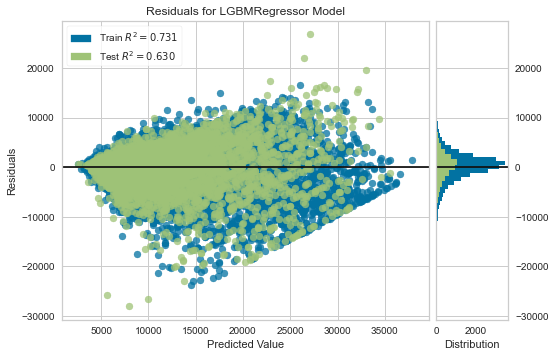

In [22]:
plot_model(tuned_lgbm)

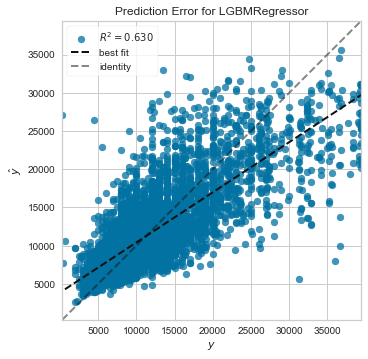

In [23]:
plot_model(tuned_lgbm, plot = 'error')

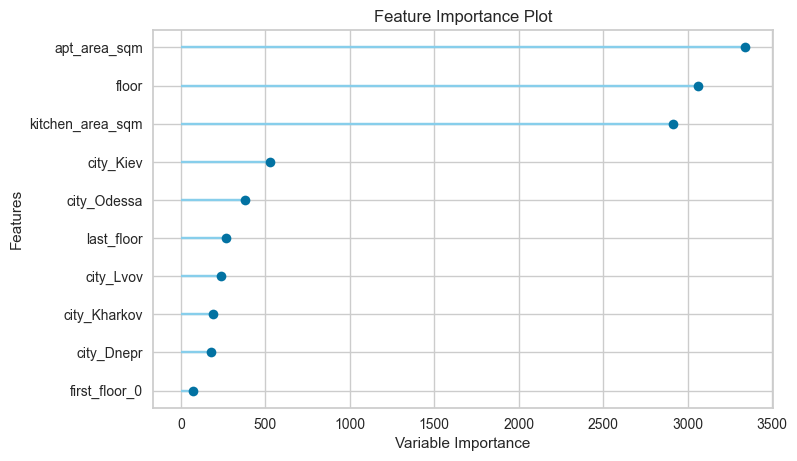

In [24]:
plot_model(tuned_lgbm, plot='feature')
